In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1
B = 2.

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [4]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[ 1  1 -1  1  1  1  1  1 -1  1]
 [ 1 -1 -1 -1 -1  1 -1  1  1  1]
 [-1 -1 -1 -1  1  1 -1 -1  1  1]
 [-1 -1 -1 -1 -1 -1  1 -1  1  1]
 [-1 -1 -1 -1  1  1  1 -1  1  1]
 [ 1 -1  1  1 -1 -1  1 -1  1 -1]
 [-1 -1 -1 -1  1  1  1  1 -1 -1]
 [-1  1 -1  1  1  1 -1 -1  1 -1]
 [ 1 -1  1  1  1 -1  1 -1  1 -1]
 [ 1 -1  1 -1 -1  1 -1 -1 -1  1]]


In [5]:
def GetEnergy(sigma):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
    
    return energy

In [6]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [7]:
print(GetEnergy(sigma), GetMagnetization(sigma))

(-4.0, -0.02)


In [8]:
# Implementamos metropolis

def _ising_step(sigma, T):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [9]:
Energy = []
Energy2 = []
Magnetization = []

T = 2.0
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T)
    
    if i > 10000:
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:07<00:00, 2533.06it/s]


In [10]:
e = np.average(Energy)/float(M*N)
e2 = np.average(Energy2)/float((M*N)**2)
m = np.average(Magnetization)

cv = float(M*N)*(e2 - e**2)/(T**2)

print(e,e2,cv,m)

(-1.7475507550755074, 3.0807714371437145, 0.6709448894684611, -0.9113111311131114)


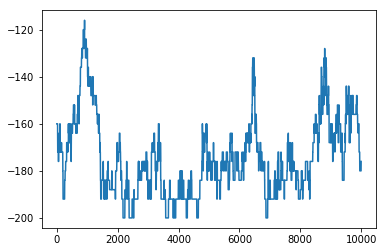

In [11]:
plt.figure()
plt.plot(Energy)

(array([2087., 1948., 1835., 1546., 1060.,  600.,  436.,  235.,  195.,
          57.]),
 array([-200. , -191.6, -183.2, -174.8, -166.4, -158. , -149.6, -141.2,
        -132.8, -124.4, -116. ]),
 <a list of 10 Patch objects>)

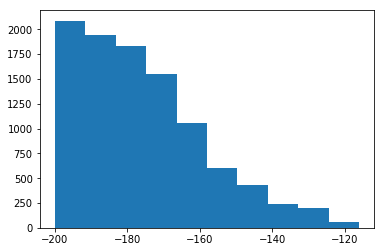

In [12]:
plt.figure()
plt.hist(Energy, bins=10)

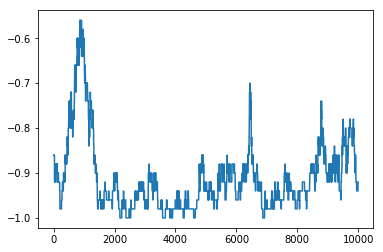

In [13]:
plt.figure()
plt.plot(Magnetization)

(array([3714., 2673., 1797.,  534.,  445.,  368.,  138.,   86.,  150.,
          94.]),
 array([-1.   , -0.956, -0.912, -0.868, -0.824, -0.78 , -0.736, -0.692,
        -0.648, -0.604, -0.56 ]),
 <a list of 10 Patch objects>)

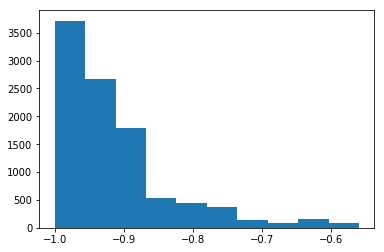

In [14]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [17]:
# Ahora vamos a variar las temperaturas

def GetValues(T, Ntoys = 20000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in range(Ntoys):
   
        sigma_ = _ising_step(sigma_,T)

        if i > 5000:
            energy = GetEnergy(sigma_)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)/float(M*N)
    e2 = np.average(Energy2)/float((M*N)**2)
    m = np.average(Magnetization)

    cv = float(M*N)*(e2 - e**2)/(T**2)   
    
    return e,m,cv    

In [18]:
T = np.arange(1.0,3.0,0.2)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in tqdm(range(len(T))):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t])
    print(GetValues(T[t]))


 10%|█         | 1/10 [00:16<02:27, 16.35s/it]

(-1.9955250350023335, -0.9988812587505834, 0.03379718880833771)



 20%|██        | 2/10 [00:32<02:10, 16.25s/it]

(-1.984444296286419, -0.9955570371358091, 0.09286981729130414)



 30%|███       | 3/10 [00:48<01:53, 16.17s/it]

(-1.9524394959663978, -0.987091139409294, 0.18855760058352022)



 40%|████      | 4/10 [01:04<01:37, 16.18s/it]

(-1.9208720581372092, 0.9774571638109208, 0.2944274240146254)



 50%|█████     | 5/10 [01:20<01:20, 16.19s/it]

(-1.872458163877592, 0.9628881925461698, 0.3119114679617093)



 60%|██████    | 6/10 [01:36<01:04, 16.14s/it]

(-1.7801640109340622, 0.928788585905727, 0.46909126697297643)



 70%|███████   | 7/10 [01:52<00:48, 16.15s/it]

(-1.591319421294753, 0.8485552370158012, 1.0071517008194129)



 80%|████████  | 8/10 [02:09<00:32, 16.15s/it]

(-1.2979905327021803, 0.6072378158543904, 1.4680643462522949)



 90%|█████████ | 9/10 [02:25<00:16, 16.22s/it]

(-0.9477058470564704, 0.018702580172011474, 0.6307435862560596)



100%|██████████| 10/10 [02:41<00:00, 16.17s/it]

(-0.9210854056937129, 0.2920421361424095, 0.504297505543999)


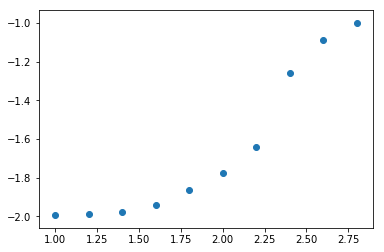

In [19]:
plt.figure()
plt.scatter(T,Energy)

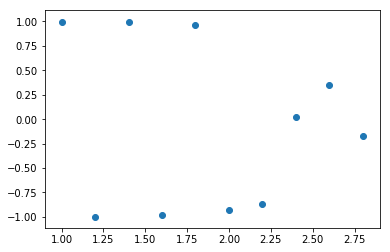

In [22]:
plt.figure()
plt.scatter(T,Mag)

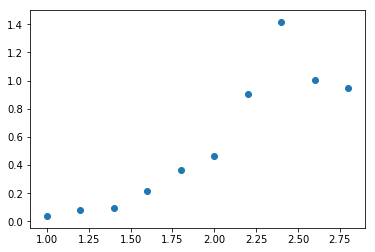

In [23]:
plt.figure()
plt.scatter(T,Cv)